# Exploratory Data Analysis 
Here we look at the raw data, its shape, outliers and the relationship between the different variables.

In [10]:
import pandas as pd
train =pd.read_csv('train.csv')
old_trans=pd.read_csv('historical_transactions.csv')
new_trans=pd.read_csv('new_merchant_transactions.csv')
merchants=pd.read_csv('merchants.csv')

def dataset_info(df):
    print(f"Size: {df.size}\n")
    print(f"Shape: {df.shape}\n")
    print(f"Columns: {df.columns.tolist()}\n")
    print(f"Data Types: \n{df.dtypes}\n")
    print(f"Null Values: \n{df.isna().count()}\n")
    print(f"Basic Statistics:\n {df.describe()}\n")

print("------------DATASET INFO-------------")
print("TRAIN")
dataset_info(train)
print("-------------------------------------")
print("MERCHANTS")
dataset_info(merchants)
print("-------------------------------------")
print("NEW TRANSACTIONS")
dataset_info(new_trans)
print("-------------------------------------")
print("OLD TRANSACTIONS")
dataset_info(old_trans)
print("-------------------------------------")


------------DATASET INFO-------------
TRAIN
Size: 1211502

Shape: (201917, 6)

Columns: ['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3', 'target']

Data Types: 
first_active_month     object
card_id                object
feature_1               int64
feature_2               int64
feature_3               int64
target                float64
dtype: object

Null Values: 
first_active_month    201917
card_id               201917
feature_1             201917
feature_2             201917
feature_3             201917
target                201917
dtype: int64

Basic Statistics:
            feature_1      feature_2      feature_3         target
count  201917.000000  201917.000000  201917.000000  201917.000000
mean        3.105311       1.745410       0.565569      -0.393636
std         1.186160       0.751362       0.495683       3.850500
min         1.000000       1.000000       0.000000     -33.219281
25%         2.000000       1.000000       0.000000      -0.883110
50%

In [ ]:
#continuous features: plot histograms
#for feature 1,2 and 3: look at correlation with target?

## Train Dataset EDA
The train dataset has the columns 'target' (our target variable), 'card_id', 'feature_1', 'feature_2' and 'feature_3'. Features 1,2 and 3 are anonymized categorical features of the cards. 'target' is the loyalty numerical score calculated 2 months after historical and evaluation period.

In [11]:
#Basic statistics of the train dataset
train.describe()


,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


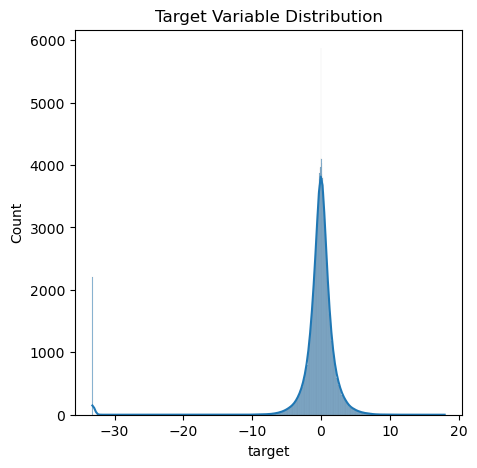

In [13]:
#Exploring distribution of the target variable

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.histplot(train['target'], kde=True)
plt.title('Target Variable Distribution')
plt.show()

<Axes: ylabel='target'>

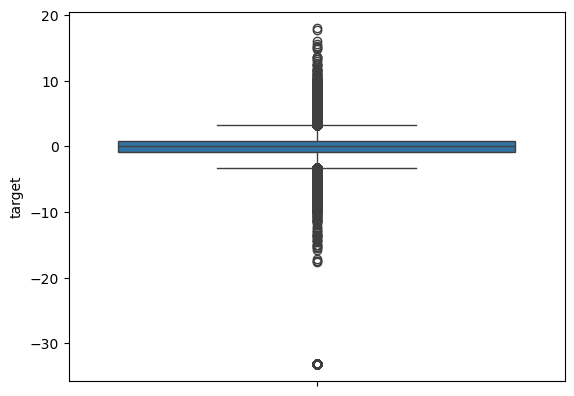

In [14]:
sns.boxplot(train['target'])

Here we observe that target has a fairly normal distribution with some outliers. Majority of the values of target are between -10 and 10. Most outliers lie below -30.

In [61]:
outliers=train[train['target']<-30]
outliers

,first_active_month,card_id,feature_1,feature_2,feature_3,target
64,2017-09,C_ID_8186f3fcc1,3,1,1,-33.219281
92,2015-05,C_ID_b9379a30ea,3,3,1,-33.219281
125,2015-10,C_ID_e9120f535c,3,3,1,-33.219281
151,2017-03,C_ID_65715cb80d,4,2,0,-33.219281
225,2017-01,C_ID_ae77d244b6,2,1,0,-33.219281
...,...,...,...,...,...,...
201169,2016-07,C_ID_e34ea29439,2,2,0,-33.219281
201262,2017-10,C_ID_081082a629,5,2,1,-33.219281
201368,2016-08,C_ID_6f61bed11c,3,3,1,-33.219281
201519,2017-05,C_ID_d6c86b18cd,2,1,0,-33.219281


### Outliers
Therefore there are around 2207 cards that count as outliers. Given the total number of elements in the dataset are 201917, this brings us to around **1.09% of the total dataset**.

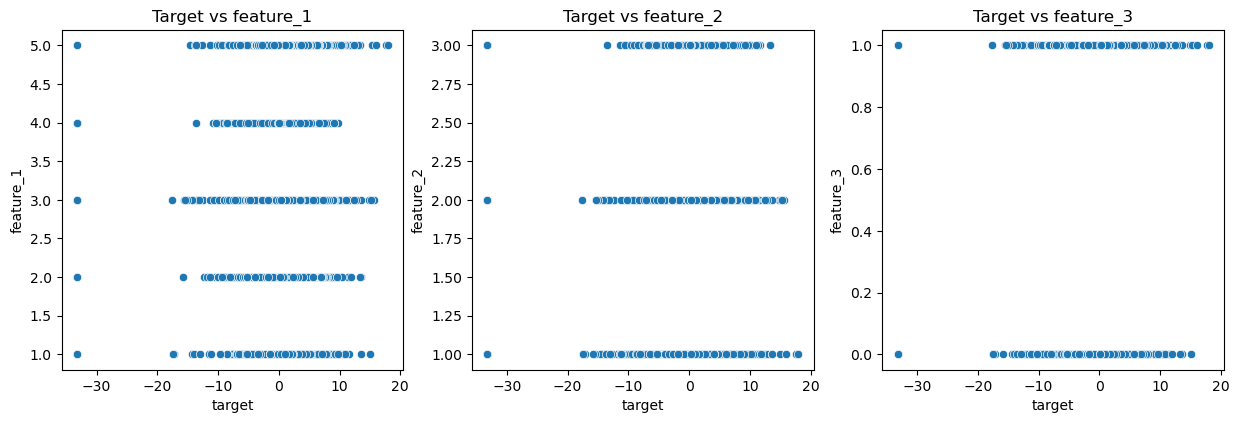

In [27]:
#Looking at target versus different feature in the train dataset
plt.figure(figsize=(15, 15))
for i, feature in enumerate(['feature_1', 'feature_2', 'feature_3']):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x='target', y=feature, data=train)
    plt.title(f'Target vs {feature}')

An important observation here is that feature 1, 2 and 3 have discrete values regardless of the value of target. The values are precisely aligned at certain levels without the variation that one would expect of numerical or continous data. 

These characteristics reinforce the fact that features 1, 2 and 3 categorical variables, which could represent:
* Discrete ratings or levels
* Classifications or categories
* Binary flags (especially feature_3, which appears to be 0/1)

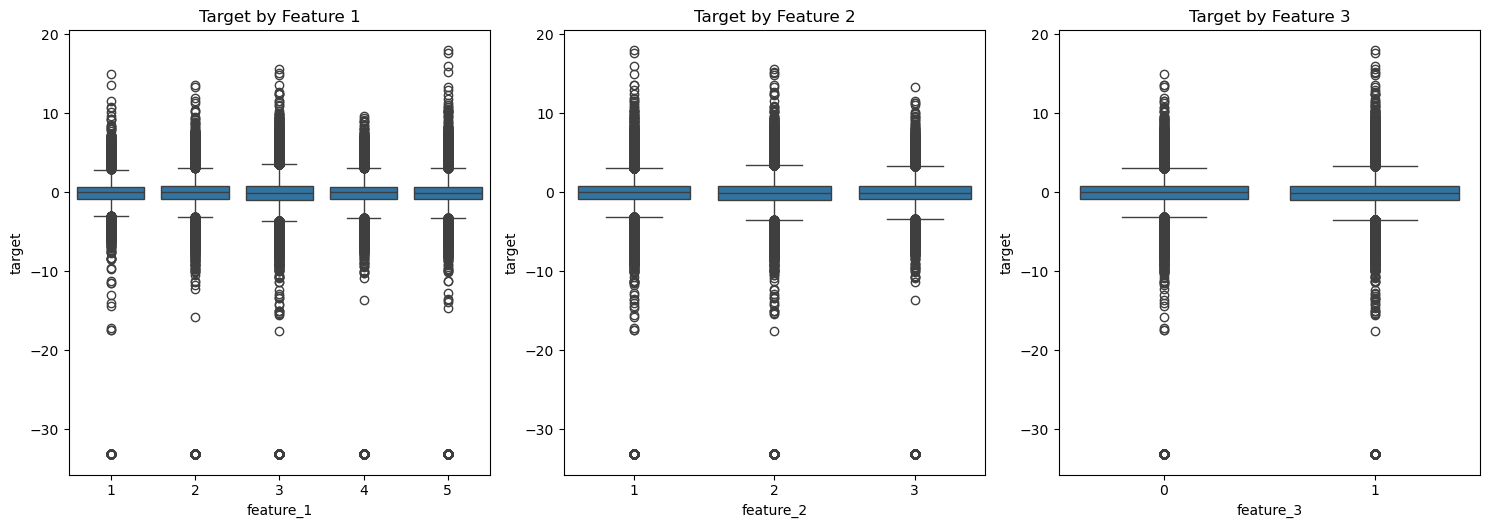

In [28]:
#Analysing target feature's relation with the other features

plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1)
sns.boxplot(x='feature_1', y='target', data=train)
plt.title('Target by Feature 1')

plt.subplot(3, 3, 2)
sns.boxplot(x='feature_2', y='target', data=train)
plt.title('Target by Feature 2')

plt.subplot(3, 3, 3)
sns.boxplot(x='feature_3', y='target', data=train)
plt.title('Target by Feature 3')

plt.tight_layout()
plt.show()

The distribution of target across the different values of features 1, 2 and 3 seems to be fairly uniform. All of them seem to have medians around 0 and similar interquartile ranges. There doesn't appear to be a strong relationship between any single feature and the target variable, which means these individual features alone may not be strong predictors of target. This means we need to further explore feature interactions, such as the relation between feature_1, feature_2 and feature_3.

To explore the interactions between feature_1, feature_2, feature_3 and target, we can use a decision tree. Observing where the tree splits can help us understand the correlation between different features and determine the importance of the features wrt target.

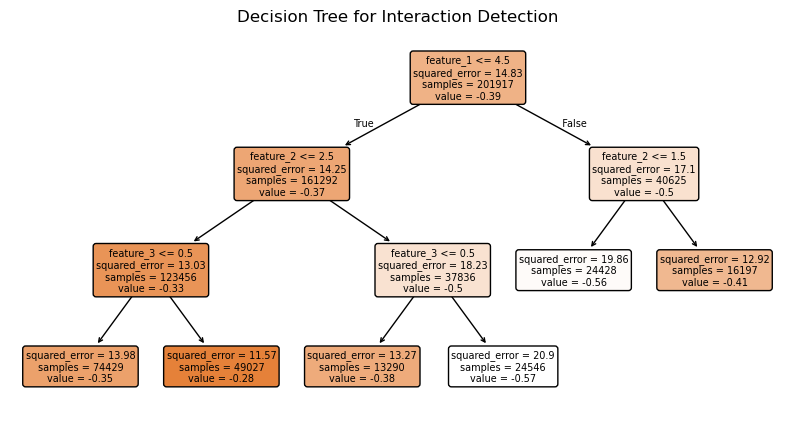

Feature Importance:
     Feature  Importance
1  feature_2    0.519552
0  feature_1    0.263911
2  feature_3    0.216537


In [31]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=100)
X = train[['feature_1', 'feature_2', 'feature_3']]
y = train['target']
tree.fit(X, y)

plt.figure(figsize=(10, 5))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, 
          fontsize=7, precision=2)
plt.title('Decision Tree for Interaction Detection')
plt.show()

#Extracting feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values('Importance', ascending=False)
print("Feature Importance:")
print(importance)

We observe that feature_2 is most important here.

* The lowest squared error (11.57) appears in a leaf node where feature_1 <= 4.5, feature_2 <= 2.5, and feature_3 <= 0.5, with value = -0.28
* The highest squared error (20.9) is in a branch where feature_3 > 0.5
* The sample sizes vary significantly across nodes, with the root containing 201,917 samples.

Feature interaction is important, since, when feature_1 ≤ 4.5, the model examines feature_2 with a threshold of 2.5. But when feature_1 > 4.5, it uses a different threshold (1.5) for feature_2. This suggests these features don't act independently but work together to predict the target.

We will explore the performance of this best-performing subset of the data later. But first we will examine the transactions and merchant data and try to find relations between the different values.

# Analysing Transaction Data

Here we have two datasets for transactions: historical_transactions.csv (here called old_trans) and new_merchant_transactions.csv (here called new_trans). We will examine the columns in both these datasets and merge based on card_id. Then we will carry out EDA.

In [54]:
new_trans=pd.DataFrame(pd.read_csv('new_merchant_transactions.csv'))
new_trans[:5]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [55]:
new_trans.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [40]:
old_trans.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [41]:
new_trans.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

In [43]:

old_trans=old_trans.groupby('card_id')
old_trans

# EDA on Best-performing segment (tree path with lowest RMSE)
The path with the lowest squared error is when feature_1<=4.5, feature_2<=2.5, and feature_3>0.5.

In [32]:
lowest_error_train=train.copy()
lowest_error_train

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749
...,...,...,...,...,...,...
201912,2017-09,C_ID_963962de2c,3,2,1,-2.740821
201913,2015-10,C_ID_1314773c0b,3,1,1,0.312917
201914,2017-08,C_ID_7666735b3d,4,3,0,0.093494
201915,2016-07,C_ID_73f5a0efd0,3,2,1,-4.676589


In [36]:
lowest_error_train=lowest_error_train[(lowest_error_train['feature_1']<=4.5) & (lowest_error_train['feature_2']<=2.5) & (lowest_error_train['feature_3']>0.5)]
lowest_error_train

,first_active_month,card_id,feature_1,feature_2,feature_3,target
6,2016-12,C_ID_7e63323c00,3,2,1,0.230129
7,2017-09,C_ID_dfa21fc124,3,2,1,2.135850
14,2017-08,C_ID_b6302b31c6,3,2,1,1.597750
30,2017-09,C_ID_8fa2ad405d,3,1,1,-3.737835
42,2017-07,C_ID_994d1ce39d,3,2,1,-0.804864
...,...,...,...,...,...,...
201906,2017-02,C_ID_1f777cd9b3,3,2,1,0.279741
201912,2017-09,C_ID_963962de2c,3,2,1,-2.740821
201913,2015-10,C_ID_1314773c0b,3,1,1,0.312917
201915,2016-07,C_ID_73f5a0efd0,3,2,1,-4.676589


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming you've already created the segment dataset
# segment_df = train[(train['feature_1'] <= 4.5) & (train['feature_2'] <= 2.5) & (train['feature_3'] <= 0.5)]

# Compare target distribution in this segment vs overall
def compare_segment_to_overall(segment_df, full_df, col='target'):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(segment_df[col], label=f'Best Segment (n={len(segment_df)})', color='blue')
    sns.kdeplot(full_df[col], label=f'Overall (n={len(full_df)})', color='red')
    plt.title(f'Distribution of {col}: Best Segment vs Overall')
    plt.xlabel(col)
    plt.legend()
    plt.savefig(f'segment_vs_overall_{col}.png')
    plt.close()
    
    # Statistical comparison
    segment_mean = segment_df[col].mean()
    overall_mean = full_df[col].mean()
    ttest = stats.ttest_ind(segment_df[col].dropna(), full_df[col].dropna(), equal_var=False)
    
    print(f"Segment mean {col}: {segment_mean:.4f}")
    print(f"Overall mean {col}: {overall_mean:.4f}")
    print(f"Difference: {segment_mean - overall_mean:.4f}")
    print(f"T-test p-value: {ttest.pvalue:.6f}")

# Basic segment profiling
def profile_segment(segment_df, full_df):
    # Size and proportion
    segment_size = len(segment_df)
    full_size = len(full_df)
    print(f"Segment size: {segment_size} ({segment_size/full_size*100:.2f}% of total)")
    
    # Compare target
    compare_segment_to_overall(segment_df, full_df, 'target')
    
    # Compare other numerical columns if available
    numerics = segment_df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerics:
        if col != 'target' and col not in ['feature_1', 'feature_2', 'feature_3']:
            compare_segment_to_overall(segment_df, full_df, col)

# Call the profiling function
profile_segment(segment_df, train)

# 2. Transaction behavior in this segment
def analyze_transaction_patterns(segment_df, hist_trans, new_trans):
    # Get card_ids for this segment
    segment_cards = set(segment_df['card_id'])
    
    # Filter transactions for these cards
    segment_hist = hist_trans[hist_trans['card_id'].isin(segment_cards)]
    segment_new = new_trans[new_trans['card_id'].isin(segment_cards)]
    
    # Overall transactions
    all_hist = hist_trans.copy()
    all_new = new_trans.copy()
    
    # Compare transaction counts
    seg_hist_per_card = segment_hist.groupby('card_id').size().mean()
    all_hist_per_card = all_hist.groupby('card_id').size().mean()
    
    seg_new_per_card = segment_new.groupby('card_id').size().mean()
    all_new_per_card = all_new.groupby('card_id').size().mean()
    
    print(f"Historical transactions per card: Segment={seg_hist_per_card:.2f}, Overall={all_hist_per_card:.2f}")
    print(f"New transactions per card: Segment={seg_new_per_card:.2f}, Overall={all_new_per_card:.2f}")
    
    # Compare purchase amounts
    if 'purchase_amount' in hist_trans.columns:
        seg_hist_amount = segment_hist['purchase_amount'].mean()
        all_hist_amount = all_hist['purchase_amount'].mean()
        
        seg_new_amount = segment_new['purchase_amount'].mean()
        all_new_amount = all_new['purchase_amount'].mean()
        
        print(f"Historical purchase amount: Segment=${seg_hist_amount:.2f}, Overall=${all_hist_amount:.2f}")
        print(f"New purchase amount: Segment=${seg_new_amount:.2f}, Overall=${all_new_amount:.2f}")
    
    # Plot purchase amount distributions
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(segment_hist['purchase_amount'].clip(upper=segment_hist['purchase_amount'].quantile(0.99)), 
                 label='Segment', color='blue', kde=True, stat='density')
    sns.histplot(all_hist['purchase_amount'].clip(upper=all_hist['purchase_amount'].quantile(0.99)), 
                 label='Overall', color='red', kde=True, stat='density')
    plt.title('Historical Purchase Amounts')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    sns.histplot(segment_new['purchase_amount'].clip(upper=segment_new['purchase_amount'].quantile(0.99)), 
                 label='Segment', color='blue', kde=True, stat='density')
    sns.histplot(all_new['purchase_amount'].clip(upper=all_new['purchase_amount'].quantile(0.99)), 
                 label='Overall', color='red', kde=True, stat='density')
    plt.title('New Purchase Amounts')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('segment_purchase_distributions.png')
    plt.close()
    
    return segment_hist, segment_new

# Call the transaction analysis function
segment_hist, segment_new = analyze_transaction_patterns(segment_df, hist_trans, new_trans)

# 3. Merchant analysis for this segment
def analyze_merchant_behavior(segment_hist, segment_new, all_hist, all_new, merchants):
    # Merge transactions with merchant data
    if 'merchant_id' in segment_hist.columns:
        seg_hist_merch = segment_hist.merge(merchants, on='merchant_id', how='left')
        all_hist_merch = all_hist.merge(merchants, on='merchant_id', how='left')
        
        seg_new_merch = segment_new.merge(merchants, on='merchant_id', how='left')
        all_new_merch = all_new.merge(merchants, on='merchant_id', how='left')
        
        # Compare merchant category distributions
        if 'merchant_category' in merchants.columns:
            # Historical transactions
            seg_hist_cats = seg_hist_merch.groupby('merchant_category').size() / len(seg_hist_merch)
            all_hist_cats = all_hist_merch.groupby('merchant_category').size() / len(all_hist_merch)
            
            # Calculate category differences (which categories are over/under-represented)
            hist_cat_diff = pd.DataFrame({
                'segment_pct': seg_hist_cats,
                'overall_pct': all_hist_cats
            }).fillna(0)
            hist_cat_diff['difference'] = hist_cat_diff['segment_pct'] - hist_cat_diff['overall_pct']
            hist_cat_diff['ratio'] = hist_cat_diff['segment_pct'] / hist_cat_diff['overall_pct'].replace(0, np.nan)
            
            # Sort by absolute difference
            hist_cat_diff = hist_cat_diff.sort_values('difference', ascending=False)
            
            # Plot top differences
            plt.figure(figsize=(12, 8))
            sns.barplot(x=hist_cat_diff['difference'].head(10).index, 
                        y=hist_cat_diff['difference'].head(10).values)
            plt.title('Top Merchant Categories Over-Represented in Segment (Historical)')
            plt.xlabel('Merchant Category')
            plt.ylabel('Percentage Point Difference')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.savefig('segment_merchant_categories_hist.png')
            plt.close()
            
            # Repeat for new transactions
            seg_new_cats = seg_new_merch.groupby('merchant_category').size() / len(seg_new_merch)
            all_new_cats = all_new_merch.groupby('merchant_category').size() / len(all_new_merch)
            
            new_cat_diff = pd.DataFrame({
                'segment_pct': seg_new_cats,
                'overall_pct': all_new_cats
            }).fillna(0)
            new_cat_diff['difference'] = new_cat_diff['segment_pct'] - new_cat_diff['overall_pct']
            new_cat_diff['ratio'] = new_cat_diff['segment_pct'] / new_cat_diff['overall_pct'].replace(0, np.nan)
            
            new_cat_diff = new_cat_diff.sort_values('difference', ascending=False)
            
            plt.figure(figsize=(12, 8))
            sns.barplot(x=new_cat_diff['difference'].head(10).index, 
                        y=new_cat_diff['difference'].head(10).values)
            plt.title('Top Merchant Categories Over-Represented in Segment (New)')
            plt.xlabel('Merchant Category')
            plt.ylabel('Percentage Point Difference')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.savefig('segment_merchant_categories_new.png')
            plt.close()
            
            # Return the category differences for further analysis
            return hist_cat_diff, new_cat_diff

# Call the merchant analysis function
hist_cat_diff, new_cat_diff = analyze_merchant_behavior(segment_hist, segment_new, hist_trans, new_trans, merchants)

# 4. Time patterns analysis
def analyze_time_patterns(segment_hist, segment_new, all_hist, all_new):
    # Convert purchase_date to datetime if it's not already
    if 'purchase_date' in segment_hist.columns:
        for df in [segment_hist, all_hist, segment_new, all_new]:
            if not pd.api.types.is_datetime64_any_dtype(df['purchase_date']):
                df['purchase_date'] = pd.to_datetime(df['purchase_date'])
        
        # Extract time components
        for df in [segment_hist, all_hist, segment_new, all_new]:
            df['month'] = df['purchase_date'].dt.month
            df['day_of_week'] = df['purchase_date'].dt.dayofweek
            df['hour'] = df['purchase_date'].dt.hour
        
        # Compare day of week distributions
        plt.figure(figsize=(12, 8))
        
        # Historical transactions
        plt.subplot(2, 1, 1)
        seg_dow = segment_hist['day_of_week'].value_counts(normalize=True).sort_index()
        all_dow = all_hist['day_of_week'].value_counts(normalize=True).sort_index()
        
        dow_df = pd.DataFrame({'Segment': seg_dow, 'Overall': all_dow})
        dow_df.plot(kind='bar', ax=plt.gca())
        plt.title('Day of Week Distribution - Historical Transactions')
        plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
        plt.ylabel('Proportion of Transactions')
        
        # New transactions
        plt.subplot(2, 1, 2)
        seg_dow_new = segment_new['day_of_week'].value_counts(normalize=True).sort_index()
        all_dow_new = all_new['day_of_week'].value_counts(normalize=True).sort_index()
        
        dow_df_new = pd.DataFrame({'Segment': seg_dow_new, 'Overall': all_dow_new})
        dow_df_new.plot(kind='bar', ax=plt.gca())
        plt.title('Day of Week Distribution - New Transactions')
        plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
        plt.ylabel('Proportion of Transactions')
        
        plt.tight_layout()
        plt.savefig('segment_day_of_week.png')
        plt.close()
        
        # Compare hour distributions
        plt.figure(figsize=(12, 8))
        
        # Historical transactions
        plt.subplot(2, 1, 1)
        seg_hour = segment_hist['hour'].value_counts(normalize=True).sort_index()
        all_hour = all_hist['hour'].value_counts(normalize=True).sort_index()
        
        hour_df = pd.DataFrame({'Segment': seg_hour, 'Overall': all_hour})
        hour_df.plot(kind='line', ax=plt.gca(), marker='o')
        plt.title('Hour of Day Distribution - Historical Transactions')
        plt.xlabel('Hour of Day')
        plt.ylabel('Proportion of Transactions')
        plt.xticks(range(0, 24, 2))
        
        # New transactions
        plt.subplot(2, 1, 2)
        seg_hour_new = segment_new['hour'].value_counts(normalize=True).sort_index()
        all_hour_new = all_new['hour'].value_counts(normalize=True).sort_index()
        
        hour_df_new = pd.DataFrame({'Segment': seg_hour_new, 'Overall': all_hour_new})
        hour_df_new.plot(kind='line', ax=plt.gca(), marker='o')
        plt.title('Hour of Day Distribution - New Transactions')
        plt.xlabel('Hour of Day')
        plt.ylabel('Proportion of Transactions')
        plt.xticks(range(0, 24, 2))
        
        plt.tight_layout()
        plt.savefig('segment_hour_of_day.png')
        plt.close()

# Call the time patterns function
analyze_time_patterns(segment_hist, segment_new, hist_trans, new_trans)

# 5. Feature engineering from this segment's characteristics
def engineer_features_from_segment(hist_trans, new_trans, merchants):
    """Create features based on the insights from the segment analysis"""
    # This is a template function - you'll customize it based on findings
    
    # First, aggregate transactions by card_id
    hist_agg = hist_trans.groupby('card_id').agg({
        'purchase_amount': ['mean', 'sum', 'std', 'count'],
        # Add other relevant aggregations based on your findings
    })
    
    # Flatten column names
    hist_agg.columns = ['_'.join(col).strip() for col in hist_agg.columns.values]
    hist_agg = hist_agg.reset_index()
    
    # Repeat for new transactions
    new_agg = new_trans.groupby('card_id').agg({
        'purchase_amount': ['mean', 'sum', 'std', 'count'],
        # Add other relevant aggregations based on your findings
    })
    
    new_agg.columns = ['_'.join(col).strip() for col in new_agg.columns.values]
    new_agg = new_agg.reset_index()
    
    # Now create segment-specific features
    # Examples (update these based on your actual findings):
    
    # If you found specific merchant categories are important
    if 'merchant_id' in hist_trans.columns:
        hist_with_merch = hist_trans.merge(merchants, on='merchant_id', how='left')
        
        # Count transactions in key merchant categories
        # Assuming you found categories 1, 3, and 5 are important from earlier analysis
        key_categories = [1, 3, 5]  # Replace with actual important categories
        
        for cat in key_categories:
            cat_counts = hist_with_merch[hist_with_merch['merchant_category'] == cat] \
                         .groupby('card_id').size().reset_index(name=f'hist_cat_{cat}_count')
            hist_agg = hist_agg.merge(cat_counts, on='card_id', how='left')
            hist_agg[f'hist_cat_{cat}_count'] = hist_agg[f'hist_cat_{cat}_count'].fillna(0)
    
    # If you found time patterns are important
    if 'purchase_date' in hist_trans.columns:
        # Ensure datetime
        hist_trans['purchase_date'] = pd.to_datetime(hist_trans['purchase_date'])
        
        # Add day of week
        hist_trans['day_of_week'] = hist_trans['purchase_date'].dt.dayofweek
        
        # Calculate percentage of weekend transactions
        weekend_trans = hist_trans[hist_trans['day_of_week'].isin([5, 6])]
        weekend_counts = weekend_trans.groupby('card_id').size().reset_index(name='weekend_count')
        
        # Merge with main aggregations
        hist_agg = hist_agg.merge(weekend_counts, on='card_id', how='left')
        hist_agg['weekend_count'] = hist_agg['weekend_count'].fillna(0)
        hist_agg['weekend_ratio'] = hist_agg['weekend_count'] / hist_agg['purchase_amount_count']
    
    # Return the engineered features
    return hist_agg, new_agg

# Generate engineered features
hist_features, new_features = engineer_features_from_segment(hist_trans, new_trans, merchants)

# Print sample of the engineered features
print("\nSample of engineered features from historical transactions:")
print(hist_features.head())

print("\nSample of engineered features from new transactions:")
print(new_features.head())